[Oregon Curriculum Network](http://4dsolutions.net/ocn/)

# The School of Tomorrow

[Home Page](School_of_Tomorrow.ipynb)

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/49982660476/in/dateposted-public/" title="ramanujan1"><img src="https://live.staticflickr.com/65535/49982660476_aa975f3e3e_c.jpg" width="800" height="330" alt="ramanujan1"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

# Lambda Calc ($\lambda$ Calc)

In one of the shoptalks or namespaces around here, we get the proposal to bifurcate the math track through high school along what used to be called college prep and vocational lines.  The vocational track had fallen out of vogue and gotten defunded, because higher education had become mandatory for most white collar and many blue collar professions.  

Meanwhile, computer science had proved relevant to society at all levels and many high schools were pushing to develop their computer science faculty, as distinct from the mathematics faculty, mirroring many colleges.

The $\Delta$- and $\lambda$- calc bifurcation would keep everything mathematical, as computer technology needs to permeate even everyday math by osmosis. However some of the topics abandoned in the rush to delta calc (*the* calculus), could now be covered under the rebric of this other calculus.  The original $\lambda$-calc of Alonso Church & Co. would be included under the newer expanded domain, following subsequent branding down around $\lambda$ in the computer field. 

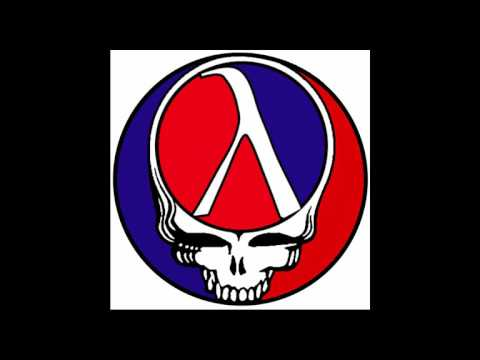

In [66]:
from IPython.display import YouTubeVideo
YouTubeVideo("eTDH7m4vEiM")

# Number Theory

Number Theory often begins with the Fundamental Theorem of Arithmetic: all positive integers may be distilled into a unique set of prime factors. If -1 is considered a prime factor, per J.H. Conway's suggestion, then all of $Z$ may be so distilled.

Determining whether a number is really prime or not, and therefore whether it has factors, is a difficult problem. The unfactorability of large composites is at the basis of the Rivest Shamir Adelson (RSA) method of public key cryptography.

The School of Tomorrow introduces number theory in steps, with a goal of making RSA comprehensible.  To this end, some vocabulary is needed, most specifically: prime, composite, totatives, totient, coprime (stranger) and modulo arithmetic i.e. operations relative to some modulus.

Python offers the modulo operator (%) and divmod as tools for doing modulo arithmetic.

### Curriculum is Shaped By Political Concerns

Because older generations are concerned with how younger generations are introduced to their culture, the process of hammering out a curriculum tends to involve political considerations.

For example, to what extent was Number Theory purged from some curricula owing to [anti-German sentiment](https://ohiohistorycentral.org/w/Anti-German_Sentiment) and a wish to deprecate all things German?  Too much Gauss would never do, and yet he was a Principal.  Solution:  spend more time on Euclidean Geometry instead.  But did it have to be either / or?

Sometimes our Notebook will be more of a springboard, a diving board, into a deep well or chasm (sounds dramatic).  You may jump into Number Theory through Cryptography as well, and may wish to study them together.  Indeed, what has brought Number Theory back into vogue, if it ever went away, is the ubiquity (omnipresence) of cryptography in our daily lives today.

In practice the security layer, called TLS, provided by a web browser, may use eliptic curve cryptography instead of RSA.  The public key system is the used to exchange symmetric keys for a faster encrypted connection.

You'll want to learn about Fermat's Little Theorem, about totatives and totients, and about Diophantine Equations.  Even earlier, let's start out with Euclid's Method for the GCD (greatest common divisor), as one of the earliest numeric algorithms out there.

Links:

* [Interview with Milo Gardner (November 24, 2011)](https://www.eimacs.com/blog/2011/11/milo-gardner-cryptanalyst-code-breaker/)

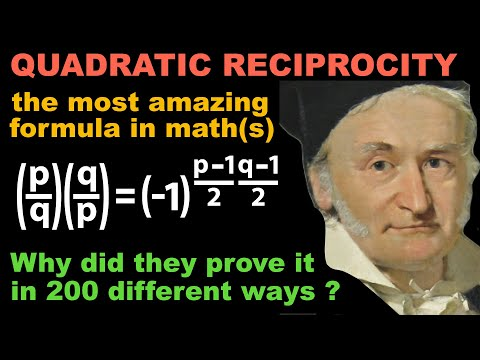

In [65]:
from IPython.display import YouTubeVideo
YouTubeVideo("X63MWZIN3gM") 

# Euclid's Method

I had you two lengths and ask you what size length in whole number size, will divide into both with no remainder.  

Start with the two lengths also being whole number.  Everything in this picture is an integer, a positive integer, a length.  

What integer length divides evenly into these two?  Clearly 1 does, as 1 divides into everything.  How about 2?  How about 3?  What's the greatest number that divides them both, without remainder?

Well, what if the smaller length already divides the larger into two.  If we call them A and B and divide A into B, not knowing which is longer, then if A is longer, it won't go into B at all.  If it does, does it go just once?  If so, we're done, and A is the GCD.  Otherwise, last possibility, there's some remainder.

That remainder then, is the next shorter length of interest.  If there's a GCD > 1, it will divide both of these, as if it does, it will also divide into B, which consists of N As + R for remainder.  So make R the new A, and B the new longest length, what used to be A.

In [1]:
N, R = divmod(12, 3) # how many times goes in N, what remainder R
(N, R)

(4, 0)

In [2]:
divmod(3, 12) # 12 doesn't go into 3, 3 is left

(0, 3)

Here's a recursive solution, based on the description above:

In [3]:
def GCD(A, B):
    N, R = divmod(B, A)  # bigger by smaller?
    if N == 0:           # if not
        return GCD(B, A) # then switch
    elif R == 0:
        return A         # if no remainder, we're done
    elif R == 1:
        return 1         # down to 1, nowhere to go so 1
    elif R > 0:
        return GCD(R, B) # keep drilling down

In [4]:
GCD(100, 30)

10

In [5]:
GCD(81, 18)

9

However Guido came up with a more brilliant, non-recursive solution, that automatically switches the arguments if a > b:

In [6]:
18 % 81 # 81 doesn't go into 18, 18 remains

18

In [36]:
print(81 % 18) # 18 goes into 81 4 times, remainder 9
print(divmod(81, 18))

9
(4, 9)


In [8]:
12 % 24 # 24 doesn't go into 12, 12 is the remainder

12

In [9]:
def gcd(a, b):
    while b:
        b, a = a % b, b
    return a

In [10]:
gcd(18, 81)

9

In [11]:
gcd(100, 30)

10

In [12]:
gcd(12, 3)

3

In [13]:
gcd(3, 12)

3

Finally, how about the Lowest Common Multiple or LCM.  That turns out to be the product of A and B (all factors combined) divided by the GCD (all factors common to both).

In [14]:
def lcm(a, b):
    return int((a * b)/gcd(a, b))

In [15]:
lcm(11, 9)

99

If two positive integers have no factors in common other than 1, they're considered "co-prime" to one another or, more colorfully, they're considered "strangers".

All numbers < N that are coprime to N are called "totatives on N" and the number of such totivatives is considered "the totient of N".  Lets do some Python.

In [62]:
def totatives(N):
    return [totative for totative in range(1, N) if gcd(N, totative)==1]

totatives(12)

[1, 5, 7, 11]

In [63]:
def 𝜙(N):
    # the totient function was called 𝜙 or "phi" by Euler
    return len(totatives(N))

In [64]:
𝜙(100)

40

#### Euler's Totient Theorem  

If ${a}$ is an integer and $m$ is a positive integer relatively prime to $a$,Then ${a}^{\phi (m)}\equiv 1 \pmod {m}$.

In [58]:
", ".join(map(str, totatives(1000)))

'1, 3, 7, 9, 11, 13, 17, 19, 21, 23, 27, 29, 31, 33, 37, 39, 41, 43, 47, 49, 51, 53, 57, 59, 61, 63, 67, 69, 71, 73, 77, 79, 81, 83, 87, 89, 91, 93, 97, 99, 101, 103, 107, 109, 111, 113, 117, 119, 121, 123, 127, 129, 131, 133, 137, 139, 141, 143, 147, 149, 151, 153, 157, 159, 161, 163, 167, 169, 171, 173, 177, 179, 181, 183, 187, 189, 191, 193, 197, 199, 201, 203, 207, 209, 211, 213, 217, 219, 221, 223, 227, 229, 231, 233, 237, 239, 241, 243, 247, 249, 251, 253, 257, 259, 261, 263, 267, 269, 271, 273, 277, 279, 281, 283, 287, 289, 291, 293, 297, 299, 301, 303, 307, 309, 311, 313, 317, 319, 321, 323, 327, 329, 331, 333, 337, 339, 341, 343, 347, 349, 351, 353, 357, 359, 361, 363, 367, 369, 371, 373, 377, 379, 381, 383, 387, 389, 391, 393, 397, 399, 401, 403, 407, 409, 411, 413, 417, 419, 421, 423, 427, 429, 431, 433, 437, 439, 441, 443, 447, 449, 451, 453, 457, 459, 461, 463, 467, 469, 471, 473, 477, 479, 481, 483, 487, 489, 491, 493, 497, 499, 501, 503, 507, 509, 511, 513, 517, 519, 521

In [61]:
m = 1000
pow(7, 𝜙(m), m) # m % 7 ** 𝜙(m)

1

Given public key N:

$$ \gcd(p, q) = 1 $$
$$ N = pq $$

and a number $e$ with inverse $d$ (secret), modulo $\phi(N)$, such that:

$$ ed \equiv 1 \pmod{\phi(N)}$$

--------------------
Encryption:
$$ c \equiv m^e \pmod{N}$$
Decryption:
$$ m^\prime \equiv c^d \pmod{N} $$
$$ m^\prime \equiv (m^e)^d \equiv m^{ed} \pmod{N} $$

Is it true that $m^\prime \equiv m$?

Thanks to Euler's Theorem:

$$ a^{\phi(N)} \equiv 1 \pmod{N}, \text{ if } \gcd(a,N) = 1. $$

Write $ed = 1 + k~\phi(N)$:
$$ m^\prime \equiv m^{1+k\phi(N)} \pmod{N}$$
$$ m^\prime \equiv m\cdot m^{k\phi(N)} \pmod{N}$$
$$ m^\prime \equiv m\cdot \underbrace{m^{k\phi(N)}}_{1} \pmod{N}$$

So $m^\prime \equiv m \pmod{N}$.


Links:

* [Chapter 5: Discovering Math with Python](https://nbviewer.jupyter.org/github/4dsolutions/Python5/blob/master/Public%20Key%20Cryptography.ipynb)
* [Camp Crypto](https://mybizmo.blogspot.com/2019/04/camp-crypto.html)

### Defining Type Q: The Rational Number Type

We can use that to define a Fraction, or rational number (Rat).  Our adventures in Python's object oriented model might, in fact, begin here, even though Python's standard library already includes a Fraction class in fraction.  Our tests might compare their behaviors.

In [16]:
from fractions import Fraction

In the Rational Number or alternative fraction class below, we make use of the ```gcd``` and ```lcm``` functions defined above.

If you haven't looked at Python a lot, you may miss some of what's going on:  Python's special names define the guts of a fraction [in terms of its operations](https://docs.python.org/3/library/operator.html). 

When you add two fractions, what happens?  A lowest common multiple makes for a denominator.  Given the initialization process reduces the fraction to lowest terms, just multiplying the two denominators together would also work.

Complexity arises when we let integers play with Rationals, which we should, as they're a subset of same.  $N \subset Z \subset Q \subset R \subset C$ as we say.

In [ ]:
from __future__ import annotations
from functools import total_ordering
from typing import Union

@total_ordering
class Rat:
    
    def __init__(self, n, d=None):
        
        if type(d) is None:
            d = 1
        if d == 0:
            raise ZeroDivisionError
            
        _gcd = gcd(n, d)
        self.numer = n//_gcd
        self.denom = d//_gcd
        
    def _convert(self, n: int) -> Rat:
        if type(other) is int:
            return ((self.numer) == other 
                     and self.denom == 1)
        elif type(other) is Rat:
            return other
        else:
            raise TypeError("Not int or Rat")
        
    def __repr__(self):
        return "(%s/%s)" % (self.numer, self.denom)
    
    def __eq__(self, other: Union[int, Rat]) -> bool:
        other = self._convert(other)
        return ((self.numer == other.numer) 
                and (self.denom == other.denom))
    
    def __gt__(self, other: Union[int, Rat]) -> bool:
        other = self._convert(other)
        _lcm = lcm(self.denom, other.denom)
        return ((self.numer * _lcm//self.denom) 
               > (other.numer * _lcm//other.denom))
    
    def __add__(self, other: Union[int, Rat]) -> Rat:
        # get an lcm before adding
        other = self._convert(other)
        _lcm = lcm(self.denom, other.denom)
        return Rat(self.numer * _lcm//self.denom
               + other.numer * _lcm//other.denom, 
               _lcm) # denominator
    
    def __sub__(self, other: Union[int, Rat]) -> Rat:
        # add the additive inverse of other
        other = self._convert(other)
        return self + (-other)
    
    def __neg__(self) -> Rat:
        # return the additive inverse of self
        return Rat(-self.numer, self.denom)
    
    def __mul__(self, other: Union[int, Rat]) -> Rat:
        # multiply two rationals
        other = self._convert(other)
        return Rat(self.numer * other.numer, 
                  self.denom * other.denom)
    
    def __truediv__(self, other: Union[int, Rat]) -> Rat:
        # multiply by the multiplicative inverse of other
        other = self._convert(other)
        return self * other**(-1)
    
    def __pow__(self, n : int) -> Rat:
        # raise self to the nth power
        return Rat(self.numer ** n, self.denom ** n)
    
    __rmul__ = __mul__
    __radd__ = __add__
    __rtruediv__ = __truediv__

Lets approach our development challenge by means of unittests.

In [32]:
from unittest import TestCase
import unittest

class TestRat(TestCase):
    
    def test_1(self):
        p = Rat(1, 3)
        q = Rat(2, 3)
        self.assertEqual(p + q, 1)
        
    def test_2(self):
        fp = Fraction(16,32)
        fq = Fraction(18,56)
        p = Rat(16,32)
        q = Rat(18,56)
        fproduct = fp * fq
        product = p * q
        self.assertEqual(fproduct.numerator, product.numer)
        self.assertEqual(fproduct.denominator, product.denom)
        
    def test_3(self):
        p = Rat(16,32)
        q = Rat(18,56)
        result = p - q
        fp = Fraction(16,32)
        fq = Fraction(18,56)
        fresult = fp - fq
        self.assertEqual(fresult.numerator, result.numer)
        self.assertEqual(fresult.denominator, result.denom)  
        
    def test_4(self):
        p = Rat(2,3)
        q = Rat(3,4)
        self.assertTrue(q > p)
        self.assertTrue(p <= q)  

In [26]:
unittest.main(argv=[''], verbosity=3, exit=False)

test_1 (__main__.TestRat) ... ok
test_2 (__main__.TestRat) ... ok
test_3 (__main__.TestRat) ... ok
test_4 (__main__.TestRat) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.025s

OK


## RAMANUJAN

\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}

In [22]:
# %load genius_identity.py
#!/usr/bin/env python3
"""
Created on Mon Jun  8 17:48:56 2020

@author: Kirby Urner

Verifying a Ramanujan Identity
https://flic.kr/p/2j9NcAd

Keywords:  recursion, number theory, arbitrary precision

School of Tomorrow
https://medium.com/@kirbyurner/calculator-of-tomorrow-using-arbitrary-precision-8f219b0092d9
https://repl.it/@kurner/RamanujanIdentity01
"""

import mpmath
from mpmath import e, pi
print(mpmath.libmp.BACKEND)
mpmath.mp.dps = 100
two   = mpmath.mpf('2')
five  = mpmath.mpf('5')
root5 = mpmath.mpf('5').sqrt()
phi = (1 + root5)/2

term = "(1 + (e ** (-2*{} * pi))/{})"

def cont_frac(n, c=1):
    """
    Recursively build the continued fraction, 
    as a string, to level of depth n
    """
    if n==0:
        return "1"
    else:    
        return "(1 + ((e ** (-2*{} * pi)/{})))".format(c, cont_frac(n-1, c+1))

print(eval(cont_frac(10))) # evaluate the continued fraction
print(1/(((phi * root5).sqrt() - phi) * e ** (two/five * pi))) # left side of the equation
print("Ta daa!")

gmpy
1.001867436219318606077227680424157087122424127427497054500130190210949798909562825712938250353099963
1.001867436219318606077227680424157087122424127427497054500130190210949798909562825712938250353099963
Ta daa!
